In [ ]:
## Cynthia Ortiz-Sanchez Section B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [8]:
# Add the boilerplate code for importing the required packages and data

import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv("/Users/cyndi/Documents/data/titanic_train_clean.csv")

print(titanic_data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [10]:
'''your code here'''

num_passengers = titanic_data['PassengerId'].count()

percent_male = (titanic_data['Sex'].mean()) * 100  # will calculate the % of male passengers

percent_survived = (titanic_data['Survived'].mean()) * 100  # will calculate the % of surviving passengers

print(f"Total passengers: {num_passengers}")
print(f"Percentage of male passengers: {percent_male:.2f}%")
print(f"Percentage of passengers who survived: {percent_survived:.2f}%")

Total passengers: 891
Percentage of male passengers: 64.76%
Percentage of passengers who survived: 38.38%


# Your written answer:

 - <891 passengers>
 - <64.76%>
 - <38.38%>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [12]:
'''your code here'''

percent_female_survived = (titanic_data[titanic_data['Sex'] == 0]['Survived'].mean()) * 100 # calculate the % of female passengers who survived

percent_male_survived = (titanic_data[titanic_data['Sex'] == 1]['Survived'].mean()) * 100 # calculate the % of male passengers who survived

print(f"Percentage of female passengers who survived: {percent_female_survived:.2f}%")
print(f"Percentage of male passengers who survived: {percent_male_survived:.2f}%")

Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%


Your written answer:

 - <74.20%>
 - <18.89%>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [16]:
'''your code here'''

ticket_stats = titanic_data.groupby('Pclass').agg(
    total_tickets=('Pclass', 'count'),
    survivorship_percentage=('Survived', 'mean')  # rate of survival calculated as decimal
)

ticket_stats['survivorship_percentage'] = ticket_stats['survivorship_percentage'] * 100 # convert decimal to %

ticket_stats['percentage_of_total_tickets'] = (ticket_stats['total_tickets'] / titanic_data['Pclass'].count()) * 100 # total tickets per class calculated as %

print(ticket_stats[['percentage_of_total_tickets', 'survivorship_percentage']])

        percentage_of_total_tickets  survivorship_percentage
Pclass                                                      
1                         24.242424                62.962963
2                         20.650954                47.282609
3                         55.106622                24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.242424
    - % survivorship: 62.962963
- Class 2 
    - % tickets: 20.650954
    - % survivorship: 47.282609
- Class 3
    - % tickets: 55.106622
    - % survivorship: 24.236253


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [18]:
'''Your code here'''

survivors = titanic_data[titanic_data['Survived'] == 1][['Age', 'Name', 'Sex']]

non_survivors = titanic_data[titanic_data['Survived'] == 0][['Age', 'Name', 'Sex']]


print("Survivors:")
print(survivors.head())

print("\nNon-Survivors:")
print(non_survivors.head())

Survivors:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


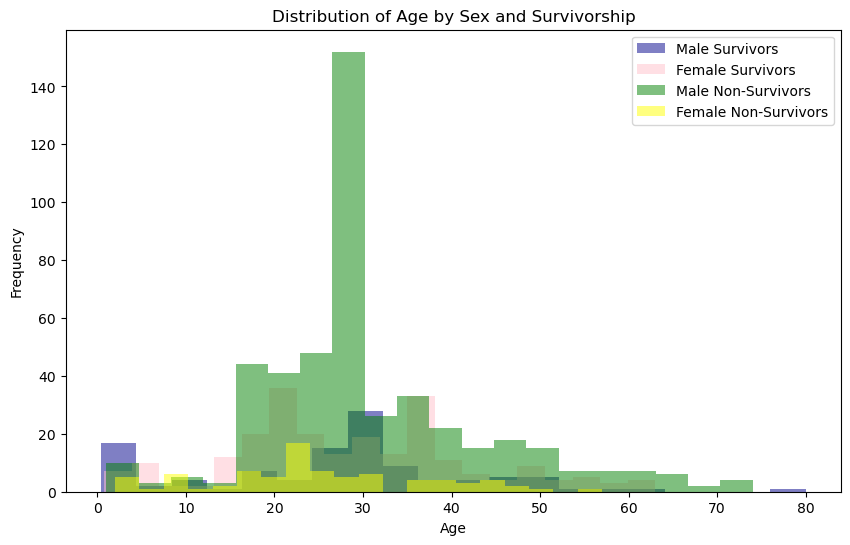

In [30]:
plt.figure(figsize=(10, 6))

plt.hist(survivors[survivors['Sex'] == 1]['Age'].dropna(), bins=20, alpha=0.5, label='Male Survivors', color='darkblue', histtype='stepfilled')

plt.hist(survivors[survivors['Sex'] == 0]['Age'].dropna(), bins=20, alpha=0.5, label='Female Survivors', color='pink', histtype='stepfilled')

plt.hist(non_survivors[non_survivors['Sex'] == 1]['Age'].dropna(), bins=20, alpha=0.5, label='Male Non-Survivors', color='green', histtype='stepfilled')

plt.hist(non_survivors[non_survivors['Sex'] == 0]['Age'].dropna(), bins=20, alpha=0.5, label='Female Non-Survivors', color='yellow', histtype='stepfilled')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Sex and Survivorship')
plt.legend()

plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

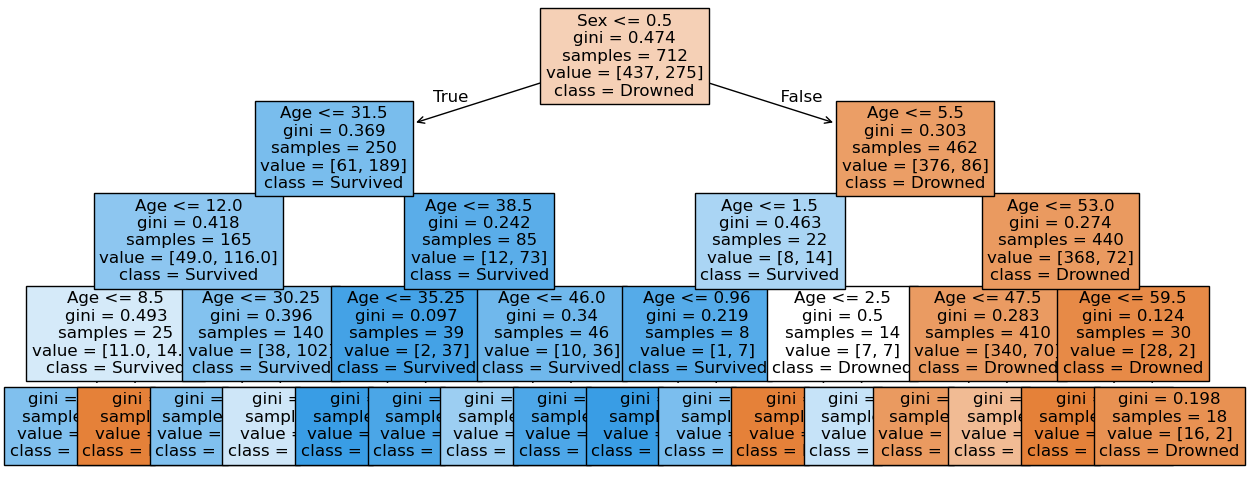

In [61]:
'''Your code here'''

import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("/Users/cyndi/Documents/data/titanic_train_clean.csv")

print(titanic_df.head())

label = ['Survived']
features = ['Sex','Age']
# we want to use all of the informative data we can get

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)


from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1,1, figsize = (15,6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned','Survived'],
          filled = True, fontsize = 12)
plt.show()
# tree_clf.__dict__

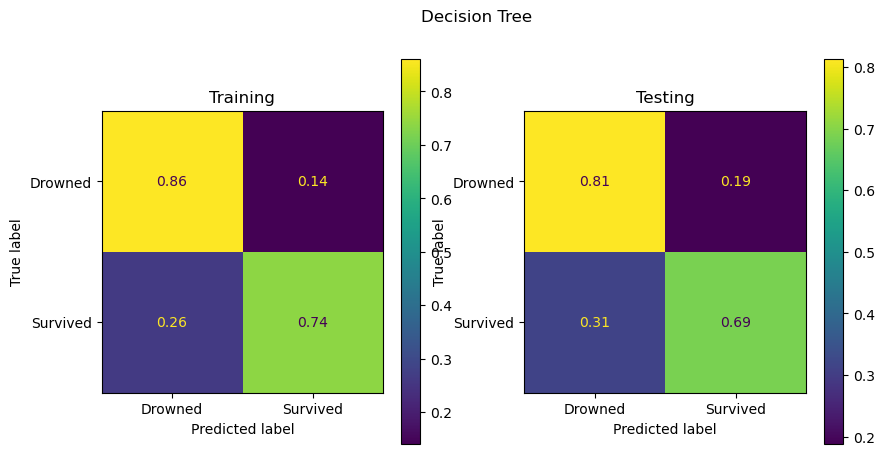

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ConfusionMatrixDisplay.from_predictions(
    y_train, y_tree_train,
    normalize='true',
    display_labels=['Drowned', 'Survived'],
    ax=ax[0]
)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_tree_test,
    normalize='true',
    display_labels=['Drowned', 'Survived'],
    ax=ax[1]
)

ax[0].set_title('Training')
ax[1].set_title('Testing')  
fig.suptitle('Decision Tree')
plt.show()                            

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - The Decision Tree model performed, to a degree, better on the training data. This is most likely because it is capable of overfitting through learning splits. Overfitting often results in lower levels of accuracy. Thee kNN model showed more similar performance on both training and test data, as it doesn’t explicitly try to fit to the training data and relies on distance-based classification. Overall, kNN provided a more consistent generalization between training and test sets, even though its accuracy was somewhat lower than the Decision Tree’s on the training data.


Which models did you fit and which worked better?
 
 - I fit the KNN model and the Decision Tree. I think that the KNN model worked better because it displayed the results far more evenly than the Decision tree. The KNN model has a level of generalizability that helps it to work better. 